# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Вероятнее всего рыночная стоимость объектов недвижимости в наибольшей степени зависит от расположения дома, в котором находится продаваемая квартира. Можно выдвинуть первую гипотезу:
- Существует обратная зависимость между стоимостью квадратного метра жилья и удаленностью от центра города, те при увеличении расстояния от центра стоимость снижается.

Также должна быть взаимосвязь между стоимость и площадью жилья. Вторая гипотеза:
- Существует обратная зависимость между стоимостью квадратного метра и общей площадью квартиры, те чем больше площадь объекта, тем дешевле каждый его квадратный метр.

Исходя из выдвинутых гипотез, сформулируем **цель исследования**:

Проверить утверждение о том, что наибольшей ценой обладают небольшие квартиры, расположенные в центральной зоне города Санкт-Петербурга.

## Изучение данных из файла

In [7]:
# импорт библиотеки pandas
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import matplotlib.pyplot as plt

In [8]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [9]:
# получение первых 10 строк таблицы df
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


In [11]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице 22 столбца. Типы данных в столбцах — 'object', 'int64' и 'bool'.

Согласно описанию данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Вывод

В названиях некоторых столбцов видны нарушения стиля (cityCenters_nearest, parks_around3000, ponds_around3000): cтрочные буквы сочетаются с прописными, при написания составных слов не используется символ подчеркивания.

В данных 14 из 22 столбцов есть пропущенные значения, их необходимо обработать.

## Предобработка данных

Изучим значения содержащиеся в каждом из столбцов, проведем необходимую предобработку. Для начала устраним нарушения стиля в наименовании столбцов. Затем подсчитаем количество пропущенных значений и проверим наличие в таблице дубликатов.

In [12]:
# переименование столбцов
df = df.rename(columns = {'cityCenters_nearest':'city_сenters_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})

In [13]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [14]:
# подсчёт пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [15]:
# подсчёт доли пропусков
df.isna().mean().round(decimals=2)

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.39
floors_total           0.00
living_area            0.08
floor                  0.00
is_apartment           0.88
studio                 0.00
open_plan              0.00
kitchen_area           0.10
balcony                0.49
locality_name          0.00
airports_nearest       0.23
city_сenters_nearest   0.23
parks_around_3000      0.23
parks_nearest          0.66
ponds_around_3000      0.23
ponds_nearest          0.62
days_exposition        0.13
dtype: float64

In [16]:
#нахождение дубликатов
df[df.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [17]:
df_flat = df[['balcony','ceiling_height','floor','floors_total','is_apartment','kitchen_area','living_area','open_plan','rooms','studio','total_area']]
df_flat

,balcony,ceiling_height,floor,floors_total,is_apartment,kitchen_area,living_area,open_plan,rooms,studio,total_area
0,nan,2.70,8,16.00,NaN,25.00,51.00,False,3,False,108.00
1,2.00,nan,1,11.00,NaN,11.00,18.60,False,1,False,40.40
2,0.00,nan,4,5.00,NaN,8.30,34.30,False,2,False,56.00
3,0.00,nan,9,14.00,NaN,nan,nan,False,3,False,159.00
4,nan,3.03,13,14.00,NaN,41.00,32.00,False,2,False,100.00
...,...,...,...,...,...,...,...,...,...,...,...
23694,nan,3.70,3,5.00,NaN,13.83,73.30,False,3,False,133.81
23695,nan,nan,4,5.00,NaN,8.50,38.00,False,3,False,59.00
23696,nan,nan,1,3.00,NaN,nan,29.70,False,2,False,56.70
23697,2.00,3.00,12,17.00,NaN,23.30,nan,False,2,False,76.75


### total_images
Предобработку данных начнем со столбца total_images. В нем содержится число фотографий квартиры в объявлении. Тип данных, согласно общей информации, int (целое число), что соответствует специфике столбца. Пропущенных значений нет. Подробней ознакомимся с данными столбца.

In [18]:
#получение значений столбца 'total_images', подсчет частоты их встречаемости
df['total_images'].value_counts().sort_index(ascending=True)

0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64

Значения столбца лежат в диапазоне от 0 до 50. В наибольшем количестве объявлений число фотографий не превышает 20 штук. Выбивающимися значениями можно считать значения больше 35 фотографий.

### last_price
В столбце last_price содержится цена квартиры на момент снятия с публикации. Тип данных - float (дробное число), что соответствует специфике столбца. Пропущенных значений нет.

In [19]:
#получение общей информации
df['last_price'].describe()

count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

Значение цены находится в диапазоне от 12 190,0 до 763 000 000,0

### total_area
В столбце total_area содержится площадь квартиры в квадратных метрах (м²). Тип данных - float (дробное число), что соответствует специфике столбца. Пропущенных значений нет.

In [20]:
#получение общей информации
df.total_area.describe().round(decimals=2)

count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

Значения площади квартир лежат в диапазоне от 12 м2 до 900 м2, при этом чаще всего встречаются значения около 60 м2.

### first_day_exposition
Столбец first_day_exposition содержит даты публикации объявления о продаже. Тип данных - object, необходимо изменение на datetime (дата и время). Пропущенных значений нет.

In [21]:
#изменение типа данных столбца 'first_day_exposition'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


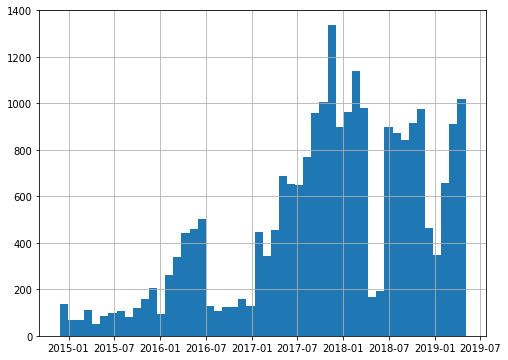

In [22]:
#построение гистограммы
df['first_day_exposition'].hist(bins=50, figsize=(8, 6))

После преобразования формата получили только дату, тк время имеет значение 0:0:0
Столбчатая диаграмма отражает изменение частоты публикаций объявлений с течением времени. В исходных данных содержатся объявления за период с конца 2014 года по начало 2019. Наибольшее количество объявлений размещалось в конце 2017 года - начале 2018 года. В целом, диаграмма смещана влево, что говорит об увеличении частоты публикаций.

### rooms
Столбец rooms содержит информацию о числе комнат. Тип данных - int (целое число), что соответствует специфике столбца. Пропущенных значений нет. Изучим подробней содержащиеся в столбе значения.

In [23]:
#получение значений столбца 'total_images', подсчет частоты их встречаемости
df['rooms'].value_counts().sort_index(ascending=True)

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Чаще всего встречаются объявления о продаже квартир, состоящих из 1 - 4 комнат, реже - 5 - 7 комнат. В единичных случаях число комнат в продаваемых квартирах доходит до 19. Столь выпадающие из общего списка значения следует проверить. Рассмотрим объявления о продаже квартир, число комнат в которых превышает 10. 

In [24]:
#извлечение соответствующих условию строк таблицы
df.query('rooms >= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
648,3,"17,500,000.00",183.70,2018-07-01,11,3.40,7.00,138.80,7,NaN,...,13.30,nan,Санкт-Петербург,"23,606.00","3,148.00",0.00,nan,0.00,nan,nan
866,5,"25,000,000.00",363.00,2017-12-23,14,3.16,5.00,222.00,4,NaN,...,16.60,nan,Санкт-Петербург,"38,076.00","7,950.00",0.00,nan,2.00,435.00,418.00
4149,6,"23,000,000.00",272.60,2018-01-11,10,3.14,7.00,145.90,7,NaN,...,18.80,1.00,Санкт-Петербург,"10,726.00","12,169.00",1.00,191.00,1.00,531.00,nan
5358,20,"65,000,000.00",590.00,2019-02-14,15,3.50,6.00,409.00,3,NaN,...,100.00,nan,Санкт-Петербург,"24,447.00","4,666.00",1.00,767.00,0.00,nan,14.00
9688,8,"33,000,000.00",194.10,2017-02-07,11,3.43,5.00,129.00,2,NaN,...,11.90,nan,Санкт-Петербург,"21,469.00","1,015.00",1.00,686.00,2.00,66.00,813.00
14498,6,"32,250,000.00",374.60,2018-06-09,19,nan,5.00,264.50,2,NaN,...,27.60,nan,Санкт-Петербург,"19,497.00","3,574.00",0.00,nan,2.00,548.00,114.00
18119,4,"15,500,000.00",216.10,2016-07-04,10,3.15,5.00,161.40,2,NaN,...,19.80,0.00,Санкт-Петербург,"24,353.00","4,921.00",1.00,368.00,0.00,nan,11.00
18848,6,"28,500,000.00",270.00,2015-03-02,16,3.00,4.00,180.00,4,NaN,...,13.00,1.00,Санкт-Петербург,"23,575.00","4,142.00",1.00,516.00,0.00,nan,"1,365.00"
18891,11,"40,000,000.00",290.00,2016-06-21,10,3.50,6.00,189.40,6,NaN,...,30.00,1.00,Санкт-Петербург,"26,229.00","4,932.00",3.00,316.00,1.00,227.00,77.00
19540,8,"420,000,000.00",900.00,2017-12-06,12,2.80,25.00,409.70,25,NaN,...,112.00,nan,Санкт-Петербург,"30,706.00","7,877.00",0.00,nan,2.00,318.00,106.00


Данные выглядят правдоподобно, площадь супер многокомнатных квартир (столбец total_area) не опускается ниже 180 м2. Дополнительно изучим данные по квартирам в которых не указано число комнат. Таких квартир 197. Можно предположить, что в таких объявлениях речь идет о квартирах-студиях или о квартирах со свободной планировкой. Проверим предположение, посчитаем количество квартир, количество комнат в которых равно 0 и при этом указано значение True в одном из столбцов open_plan или studio.

In [25]:
#извлечение подходящих под условия строк
df_flat.query('(rooms == 0 and open_plan == True) or (rooms == 0 and studio == True)')

,balcony,ceiling_height,floor,floors_total,is_apartment,kitchen_area,living_area,open_plan,rooms,studio,total_area
144,2.00,nan,2,24.00,NaN,nan,15.50,False,0,True,27.00
349,0.00,nan,1,14.00,NaN,nan,17.00,True,0,False,25.00
440,2.00,nan,4,17.00,NaN,nan,24.75,False,0,True,27.11
508,1.00,nan,19,26.00,NaN,nan,24.30,True,0,False,34.40
608,nan,nan,7,10.00,NaN,nan,nan,False,0,True,25.00
...,...,...,...,...,...,...,...,...,...,...,...
23210,0.00,nan,16,25.00,NaN,nan,18.00,False,0,True,26.00
23442,2.00,nan,4,24.00,NaN,nan,18.00,True,0,False,27.70
23554,nan,nan,8,19.00,NaN,nan,nan,False,0,True,26.00
23592,2.00,nan,8,9.00,NaN,nan,18.00,True,0,False,29.00


197 квартир. Действительно, все квартиры, для которых не указано количество комнат, это или квартиры-студии или квартиры со свободной планировкой.

### ceiling_height
<a id='2.6'></a>
В столбце ceiling_height указана высота потолков (м). В данном столбце содержится значительное количество пропущенных значений (9195). Тип данных - float (дробное число), что соответствует специфике столбца.

In [26]:
#получение значений столбца 'total_images', подсчет частоты их встречаемости
df['ceiling_height'].value_counts().sort_index(ascending=True)

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 183, dtype: int64

Сведения о высоте потолка крайне неоднородны, имеются такие артефакты, как неправдоподобно низкие (менее 2.0 метров) и неправдоподобно высокие (более 4.5 метров) потолки.

Сформируем срез данных, не включающий указанные артефакты. Расчитаем для данного среза среднее значение, которым заменим пропущенные значения в столбце.

In [27]:
#сохранение ненулевых значений по столбцу
ceiling_height_before_filna = df[df['ceiling_height'].notna()]

In [28]:
#замена пропущенных значений, средним значением по столбцу
ceiling_height_mean = df[(df['ceiling_height']>=2.0) & (df['ceiling_height']<4.5)]['ceiling_height'].mean().round(decimals=2)
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_mean)

### floors_total
В столбце floors_total содержится информация о количестве этажей в доме. В столбце имеются пропуски (86). Тип данных - float (дробное число), что соответствует специфике столбца.

In [29]:
#сохранение строк таблицы с ненулевыми значениями в столбце
floors_total_notna = df[df['floors_total'].notna()]

Для заполнения пропусков обратимся к столбцу floor, в нем содержатся данные об этаже, на котором расположена квартира. В этом столбце нет пропусков и подходящий тип данных. Исходя из утверждения, что значение столбца floors_total не может быть меньше значения столбца floors, заполним пропущенные значения столбца floors_total соответствующими значениями столбца floor.

In [30]:
#замена пропущенных значений, значением другого столбца
#df['floors_total'] = df['floors_total'].fillna(df['floor'])
df.query('floors_total == "NaN" and floor == 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
237,4,"2,438,033.00",28.10,2016-11-23,1,2.72,nan,20.75,1,NaN,...,nan,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,nan,1.00,374.00,251.00
3817,1,"1,640,000.00",23.98,2015-08-25,1,2.72,nan,nan,1,NaN,...,nan,0.00,посёлок Щеглово,"61,908.00","34,085.00",0.00,nan,0.00,nan,378.00
15989,1,"4,100,000.00",74.50,2017-04-22,3,2.72,nan,nan,1,NaN,...,nan,0.00,Красное Село,"25,382.00","28,806.00",0.00,nan,0.00,nan,72.00


Убедимся, что проведенная замена не исказила общих закономерностей распределения значений столбца. Для этого построим две гистограммы
- для ненулевых значений столбца до замены (floors_total_notna)
- для всех значений столбца после замены (df)

Объеденим оба графика на одних осях для наглядного сравнения.

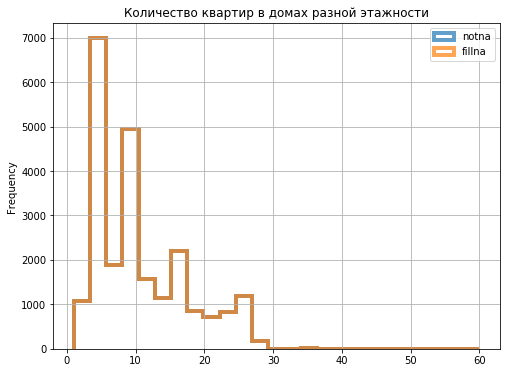

In [31]:
#построение гистограмм
ax = floors_total_notna.plot(kind='hist',y='floors_total',histtype='step',bins=25,
    linewidth=4,alpha=0.7,label='notna')
df.plot(kind='hist',y='floors_total',histtype='step',bins=25,linewidth=4,alpha=0.7,
    label='fillna',ax=ax,grid=True,legend=True,figsize=(8, 6), title='Количество квартир в домах разной этажности')


Наблюдаем почти полное совпадение гистограмм. Произведенная замена пропущенных значений не исказила общих закономерностей распределения значений столбца. Изучим диапазон значений.
Распределение значений столбца от 1 до 30 этажей выглядит правдоподобно. Бросаются в глаза редкие значения, достигающие отметки 60. Выясним что в Санкт-Петербурге самое высокое здание - Лахта Центр 87 этажей. Будем считать значения столбца корректными.

### living_area
Столбец living_area — жилая площадь в квадратных метрах (м²). В данном столбце содержится значительное количество пропущенных значений(1903). Тип данных - float (дробное число)Т, что соответствует специфике столбца.

In [32]:
#получение общй информации
df.living_area.describe().round(decimals=1)

count   21,796.00
mean        34.50
std         22.00
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

Для замены пропусков расчитаем отношение площади кухни к общей площади квартиры. Затем получим медианное значение данного отношения, расчитанное для строк, не имеющих пропусков в столбце kitchen_area. В результате расчетов получим коэффициент перевода общей площади квартиры в площадь кухни. Применем его для заполнения пропущенных значений в столбце kitchen_area

In [33]:
#сохранение строк таблицы с ненулевыми значениями в столбце
living_area_notna = df[df['living_area'].notna()]

In [34]:
#заполнение пропущенных значений
living_area_median = (df['living_area'] / df['total_area']).median()
df['living_area'] = df['living_area'].fillna(df['total_area']*living_area_median)

Убедимся, что проведенная замена не исказила общих закономерностей распределения значений столбца. Для этого построим две гистограммы
- для ненулевых значений столбца до замены (living_area_notna)
- для всех значений столбца после замены (df)

Объеденим оба графика на одних осях для наглядного сравнения.

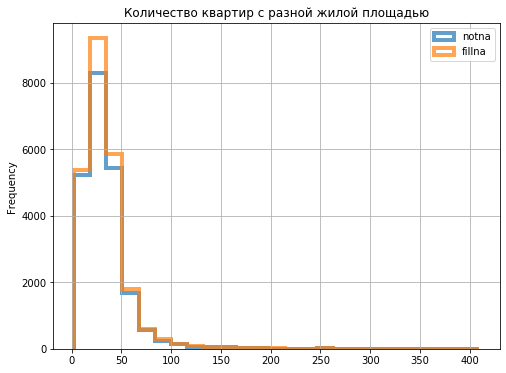

In [35]:
#построение групповых гистограмм
ax = living_area_notna.plot(kind='hist',y='living_area',histtype='step',
    bins=25,linewidth=4,alpha=0.7,label='notna')
df.plot(kind='hist',y='living_area',histtype='step',
    bins=25,linewidth=4,alpha=0.7,label='fillna',ax=ax,grid=True,legend=True,figsize=(8, 6), title='Количество квартир с разной жилой площадью')

Произведенная замена пропущенных значений не исказила общих закономерностей распределения значений столбца. 

### floor

Столбец floor содержит указание на каком этаже располагается квартира. Пропущенных значений нет. Изменение типа данных не требуется

In [36]:
#получение значений столбца 'total_images', подсчет частоты их встречаемости
df['floor'].value_counts().sort_index(ascending=True)

1     2917
2     3368
3     3073
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

Значения столбца выглядят корректно.

### is_apartment

Столбец is_apartment содержит информацию о том, является продаваемая недвижимость апартаментами или квартирой. В данном столбце содержится значительное количество пропущенных значений (20924). Тип данных - bool. Вероятно если человек не указал, что жилье является апартаментами, оно ими не является. Такие пропуски заменим на 0.

In [37]:
#получение значений столбца, подсчет частоты их встречаемости
df['is_apartment'].value_counts(dropna=False).sort_index(ascending=True)

False     2725
True        50
NaN      20924
Name: is_apartment, dtype: int64

In [38]:
#заполнение пропущенных значений
df['is_apartment'] = df['is_apartment'].fillna(0)

In [39]:
a = df[df['is_apartment'].isna()]
display(a['first_day_exposition'].min())
a['first_day_exposition'].max()

NaT

NaT

Главное отличие квартиры и апартаментов заключается в том, что квартира – это объект жилой недвижимости, а апартаменты – объект недвижимости коммерческой. Собственник апартаментов имеет на них вечные права, но не может, например, постоянно прописаться там или зарегистрировать для постоянного проживания третьих лиц. Так как стоимость апартаментов обычно ниже стоимости квартир на 15-20%, в решении вопроса о заполнении пропущенных значений, могут помочь данные о цене за м2. Они позднее будут расчитаны.

### studio

Столбец studio содержит информацию о том, является ли продаваемая недвижимость квартирой-студией. В данном столбце пропущенных значений нет. Тип данных - bool

In [40]:
#получение значений столбца, подсчет частоты их встречаемости
df['studio'].value_counts().sort_index(ascending=True)

False    23550
True       149
Name: studio, dtype: int64

### open_plan 

Столбец open_plan содержит информацию о типе планировки: свободная или нет. В данном столбце пропущенных значений нет. Тип данных - bool

In [41]:
#получение значений столбца, подсчет частоты их встречаемости
df['open_plan'].value_counts().sort_index(ascending=True)

False    23632
True        67
Name: open_plan, dtype: int64

### kitchen_area

В столбце kitchen_area содержится площадь кухни в квадратных метрах (м²). В данном столбце содержится значительное количество пропущенных значений(2278). Тип данных - float (дробное число), что соответствует специфике столбца.

In [42]:
#получение общих данных столбца 'kitchen_area'
df.kitchen_area.describe().round(decimals=2)

count   21,421.00
mean        10.57
std          5.91
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

Для замены пропусков расчитаем отношение площади кухни к общей площади квартиры. Затем получим медианное значение данного отношения, расчитанное для строк, не имеющих пропусков в столбце kitchen_area. В результате расчетов получим коэффициент перевода общей площади квартиры в площадь кухни. Применем его для заполнения пропущенных значений в столбце kitchen_area

In [43]:
#сохранение строк таблицы с ненулевыми значениями в столбце
kitchen_area_notna = df[df['kitchen_area'].notna()]

In [44]:
#заполнение пропущенных значений
kitchen_median = (df['kitchen_area'] / df['total_area']).median()
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*kitchen_median)

Убедимся, что проведенная замена не исказила общих закономерностей распределения значений столбца. Для этого построим две гистограммы
- для ненулевых значений столбца до замены (kitchen_area_notna)
- для всех значений столбца после замены (df)

Объеденим оба графика на одних осях для наглядного сравнения.

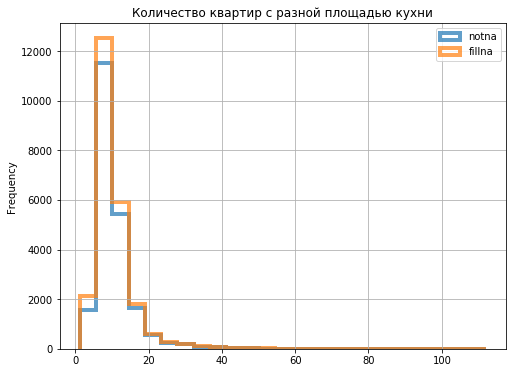

In [45]:
#построение групповых гистограмм
ax = kitchen_area_notna.plot(kind='hist',y='kitchen_area',histtype='step',bins=25,
    linewidth=4,alpha=0.7,label='notna')
df.plot(kind='hist',y='kitchen_area',histtype='step',bins=25,
    linewidth=4,alpha=0.7,label='fillna',ax=ax,grid=True,legend=True,figsize=(8, 6), title='Количество квартир с разной площадью кухни')

Произведенная замена пропущенных значений не исказила общих закономерностей распределения значений столбца. 

### balcony

Столбец содержит данные о количестве балконов в продаваемой квартире. Тип данных - float (дробное число), что не соответствует специфике столбца.Требуется замена типа данных на int (целое чсло). Имеются пропущенные значения (11519). Вероятно если человек не указал число балконов — скорее всего, их нет. Такие пропуски заменим на 0.


In [46]:
#замена пропущенных значений на 0
df['balcony'] = df['balcony'].fillna(0)

In [47]:
#изменение типа данных столбца 'last_price'
df['balcony'] = df['balcony'].astype('int')

In [48]:
#получение значений столбца 'balcony', подсчет частоты их встречаемости
df['balcony'].value_counts().sort_index(ascending=True)

0    15277
1     4195
2     3659
3       81
4      183
5      304
Name: balcony, dtype: int64

Данные в столбце корректны.

### locality_name 

В столбце locality_name содержится название населённого пункта. Тип данных object. Количество пропущенных значений 49.

In [49]:
#получение значений столбца 'locality_name', подсчет частоты их встречаемости
df['locality_name'].value_counts()

Санкт-Петербург         15721
посёлок Мурино            522
посёлок Шушары            440
Всеволожск                398
Пушкин                    369
                        ...  
село Никольское             1
поселок Семиозерье          1
деревня Хапо-Ое             1
поселок Севастьяново        1
поселок Почап               1
Name: locality_name, Length: 364, dtype: int64

Обратим внимание на написание слов "поселок" и "посёлок". Не исключено, что в столбце встречаются и другие неявные дубликаты. Удалим принадлежность к типу населенного пункта и повторно выведем список уникальных значений столбца.

In [50]:
#замена значений столбца
df['locality_name'] = df['locality_name'].str.replace('поселок ', "")
df['locality_name'] = df['locality_name'].str.replace('посёлок ', "")
df['locality_name'] = df['locality_name'].str.replace('деревня ', "")
df['locality_name'] = df['locality_name'].str.replace('городского типа ', "")
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество ', "")
df['locality_name'] = df['locality_name'].str.replace('село ', "")
df['locality_name'] = df['locality_name'].str.replace('городской ', "")
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество ', "")
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной станции ', "")
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', "")
df['locality_name'] = df['locality_name'].str.replace('станции ', "")
df['locality_name'].value_counts()

Санкт-Петербург            15721
Мурино                       590
Кудрово                      472
Шушары                       440
Всеволожск                   398
                           ...  
Платформа 69-й километр        1
Нижние Осельки                 1
Гончарово                      1
Котлы                          1
Семиозерье                     1
Name: locality_name, Length: 305, dtype: int64

Количество уникальных значений сократилось с 364 до 305.
Пропущенные значения оставляем без изменений

### airports_nearest 

В столбце airports_nearest содержится расстояние до ближайшего аэропорта в метрах (м). Тип данных - float (дробное число), что соответствует специфике столбца. Количество пропущенных значений 5542. Изучим общую информацию о данных. 
Учитывая то, что данные получены автоматически на основе картографических материалов, можно предположить, что причина появления пропущенных значений имеет технический характер. Заменять пропущенные значения в данном столбце не целесообразно.

In [51]:
#общий обзор данных
df.airports_nearest.describe().round(decimals=2)

count   18,157.00
mean    28,793.67
std     12,630.88
min          0.00
25%     18,585.00
50%     26,726.00
75%     37,273.00
max     84,869.00
Name: airports_nearest, dtype: float64

### city_сenters_nearest

В столбце city_сenters_nearest содержится расстояние до центра города (м). Тип данных - float (дробное число), что соответствует специфике столбца. Количество пропущенных значений 5519. Изучим общую информацию о данных. 
Учитывая то, что данные получены автоматически на основе картографических материалов, можно предположить, что причина появления пропущенных значений имеет технический характер. Заменять пропущенные значения в данном столбце не целесообразно.

In [52]:
#общий обзор данных
df.city_сenters_nearest.describe().round(decimals=2)

count   18,180.00
mean    14,191.28
std      8,608.39
min        181.00
25%      9,238.00
50%     13,098.50
75%     16,293.00
max     65,968.00
Name: city_сenters_nearest, dtype: float64

### parks_around_3000

В столбце parks_around_3000 содержится информация о количестве парков в радиусе 3 км. Тип данных - float (дробное число), что не соответствует специфике столбца. Количество пропущенных значений 5518. Для изменения типа данных с float на int необходима замена или удаление пропущенных значений. Делать этого не будем ввиду нецелесообразности. Изучим общую информацию о данных. 
Учитывая то, что данные получены автоматически на основе картографических материалов, можно предположить, что причина появления пропущенных значений имеет технический характер.

In [53]:
#получение значений столбца , подсчет частоты их встречаемости
df['parks_around_3000'].value_counts()

0.00    10106
1.00     5681
2.00     1747
3.00      647
Name: parks_around_3000, dtype: int64

### parks_nearest

В столбце parks_nearest содержится расстояние до ближайшего парка (м). Тип данных - float (дробное число), что соответствует специфике столбца. Количество пропущенных значений 15620. Изучим общую информацию о данных. 
Учитывая то, что данные получены автоматически на основе картографических материалов, можно предположить, что причина появления пропущенных значений имеет технический характер. Заменять пропущенные значения в данном столбце не целесообразно.

In [54]:
#общий обзор данных
df.parks_nearest.describe().round(decimals=2)

count   8,079.00
mean      490.80
std       342.32
min         1.00
25%       288.00
50%       455.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64

### ponds_around_3000

В столбце ponds_around_3000 содержится число водоёмов в радиусе 3 км. Тип данных - float (дробное число), что не соответствует специфике столбца. Требуется изменение типа данных на int (целое число). Количество пропущенных значений 5518. Для изменения типа данных с float на int необходима замена или удаление пропущенных значений. Делать этого не будем ввиду нецелесообразности. Изучим общую информацию о данных. 
Учитывая то, что данные получены автоматически на основе картографических материалов, можно предположить, что причина появления пропущенных значений имеет технический характер.

In [55]:
#получение значений столбца , подсчет частоты их встречаемости
df['ponds_around_3000'].value_counts()

0.00    9071
1.00    5717
2.00    1892
3.00    1501
Name: ponds_around_3000, dtype: int64

### ponds_nearest

В столбце ponds_nearest содержится расстояние до ближайшего водоёма (м). Тип данных - float (дробное число), что соответствует специфике столбца. Количество пропущенных значений 14589. Изучим общую информацию о данных.
Учитывая то, что данные получены автоматически на основе картографических материалов, можно предположить, что причина появления пропущенных значений имеет технический характер. Заменять пропущенные значения в данном столбце не целесообразно.

In [56]:
#общий обзор данных
df.ponds_nearest.describe().round(decimals=2)

count   9,110.00
mean      517.98
std       277.72
min        13.00
25%       294.00
50%       502.00
75%       729.00
max     1,344.00
Name: ponds_nearest, dtype: float64

### days_exposition


В столбце days_exposition содержится информация о количестве дней, сколько было размещено объявление (от публикации до снятия)
Тип данных float (дробное число), что не соответствует специфике столбца. Количество пропущенных значений 3181. Изучим общую информацию о данных.

In [57]:
#изменение типа данных
df['days_exposition'] = pd.to_numeric(df['days_exposition'], errors='coerce')

In [58]:
#общий обзор данных
df.days_exposition.describe().round(decimals=2)

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

В целом, учитывая специфику столбца, распределение значений выглядит корректно. Вызывает вопросы большое количество пропущенных значений. Данные, вероятнее всего, получены автоматически. Можно сделать вывод о том, что объявления, имеющие пропуск в столбце days_exposition, были актуальны на момент выгрузки исходных данных. Дату выгрузки исходных данных определим как максимальное значение столбца first_day_exposition.

In [59]:
#определение крайнего значения столбца first_day_exposition
df.first_day_exposition.max()

Timestamp('2019-05-03 00:00:00')

### Вывод

Проведена предобработка данных. В столбцах first_day_exposition и balcony измен тип данных.
В столбцах ceiling_height, floors_total, living_area, kitchen_area, balcony заполнены пропущенные значения.

## Расчёты и добавление результатов в таблицу

In [60]:
#добавление в таблицу столбца, содержащего цену квадратного метра
df['price_meter'] = df['last_price'] / df['total_area']
df['price_meter'].describe()

count      23,699.00
mean       99,421.66
std        50,306.80
min           111.83
25%        76,585.47
50%        95,000.00
75%       114,256.33
max     1,907,500.00
Name: price_meter, dtype: float64

In [61]:
#добавление в таблицу столбца, содержащего день недели публикации объявления
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['weekday_exposition'].value_counts().sort_index(ascending=True)

0    3612
1    4183
2    3974
3    4295
4    4000
5    1936
6    1699
Name: weekday_exposition, dtype: int64

In [62]:
#добавление в таблицу столбца, содержащего месяц публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month
df['month_exposition'].value_counts().sort_index(ascending=True)

1     1500
2     2640
3     2587
4     2379
5     1274
6     1760
7     1695
8     1744
9     1981
10    2127
11    2371
12    1641
Name: month_exposition, dtype: int64

In [63]:
#добавление в таблицу столбца, содержащего год публикации объявления
df['year_exposition'] = df['first_day_exposition'].dt.year
df['year_exposition'].value_counts().sort_index(ascending=True)

2014     137
2015    1191
2016    2783
2017    8190
2018    8519
2019    2879
Name: year_exposition, dtype: int64

In [64]:
#добавление в таблицу столбца, содержащего этаж квартиры (варианты — первый, последний, другой)

def floors_group(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
         return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
   
df['floors_group'] = df.apply(floors_group, axis=1)

df['floors_group'].value_counts().sort_index(ascending=True)

другой       17446
первый        2917
последний     3336
Name: floors_group, dtype: int64

In [65]:
#добавление в таблицу столбца, содержащего соотношение жилой и общей площади
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['living_area_ratio'].describe()

count   23,699.00
mean         0.57
std          0.10
min          0.02
25%          0.50
50%          0.57
75%          0.63
max          1.00
Name: living_area_ratio, dtype: float64

In [66]:
#добавление в таблицу столбца, содержащего отношение площади кухни к общей площади
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']
df['kitchen_area_ratio'].describe()

count   23,699.00
mean         0.19
std          0.07
min          0.03
25%          0.14
50%          0.17
75%          0.22
max          0.79
Name: kitchen_area_ratio, dtype: float64

In [67]:
# получение первых 5 строк таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_meter,weekday_exposition,month_exposition,year_exposition,floors_group,living_area_ratio,kitchen_area_ratio
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,...,2.00,755.00,nan,"120,370.37",3,3,2019,другой,0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,2.72,11.00,18.60,1,0,...,0.00,nan,81.00,"82,920.79",1,12,2018,первый,0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,2.72,5.00,34.30,4,0,...,2.00,574.00,558.00,"92,785.71",3,8,2015,другой,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,2.72,14.00,90.29,9,0,...,3.00,234.00,424.00,"408,176.10",4,7,2015,другой,0.57,0.17
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,...,1.00,48.00,121.00,"100,000.00",1,6,2018,другой,0.32,0.41


In [68]:
# получение общей информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_сenters_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

### Вывод

В таблицу добавлены столбцы:
- price_meter,
- weekday_exposition, 
- month_exposition, 
- year_exposition, 
- floors_group, 
- living_area_ratio, 
- kitchen_area_ratio

## Исследовательский анализ данных

### Изучение площади, цены, числа комнат, высоты потолков.

Text(0.5, 0, 'Общая площадь (м2)')

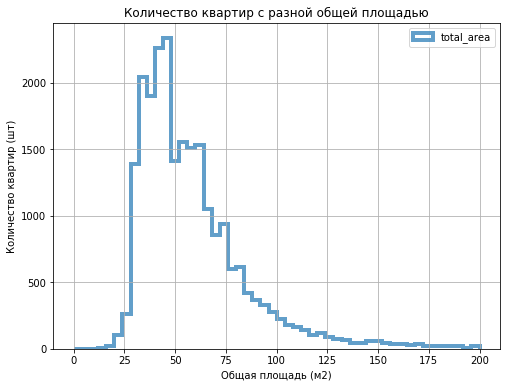

In [69]:
#построение гистограммы: общая площадь
df.plot(kind='hist',y='total_area',histtype='step',bins=50,range = (0, 200),linewidth=4,
    alpha=0.7,grid=True,legend=True,figsize=(8, 6), title='Количество квартир с разной общей площадью')
plt.ylabel('Количество квартир (шт)')
plt.xlabel('Общая площадь (м2)')

In [70]:
# получение количества строк не попавших на гисторамму
len(df.query('total_area > 200'))

227

Гистограмма отражает частоту встречаемости квартир разной площади. На ней отражены данные в диапазоне от 12м2 до 200м2. Квартир площадью от 200м2 до 900м2 в исходных данных 227, те менее 1%. Будем считать их выбросами.
На гистограмме наблюдается мощный пик со значениями 30-60 м2. Очень мало значений после 125 м2.
Данное распределение было интуитивно ожидаемым. Это типичная площадь 1-2-3 комнатных квартир, которые чаще всего продаются и покупуются.
В целом гистограмма смещена вправо, тк специфика данных исключает чрезмерно малые значения, но при этом не ограничивает максимальное значение. 

Text(0.5, 0, 'Стоимость за м2')

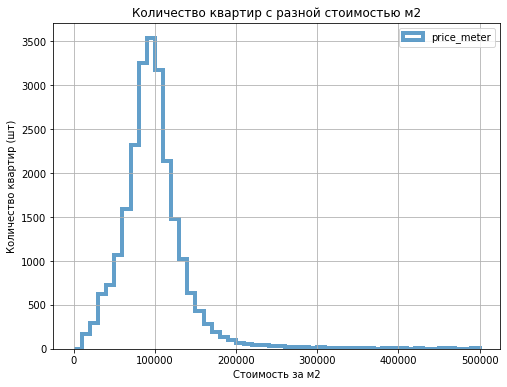

In [71]:
#построение гистограммы: цена
df.plot(kind='hist',y='price_meter',histtype='step',bins=50,
    linewidth=4,alpha=0.7,grid=True,legend=True,range = (0, 500000),figsize=(8, 6), title='Количество квартир с разной стоимостью м2')
plt.ylabel('Количество квартир (шт)')
plt.xlabel('Стоимость за м2')

In [72]:
# получение количества строк не попавших на гисторамму
len(df.query('price_meter > 500000'))

38

Гистограмма отражает частоту встречаемости разной стоимости м2. На ней отражены данные в диапазоне от 111 до 500 000. Квартир с ценой м2 от 500 000 до 1 907 500 в исходных данных 38, те менее 0.2%. Будем считать их выбросами.
На гистограмме наблюдается мощный узкий пик со значениями 500 000 - 1 500 000. Очень мало значений после 250 000.
В целом гистограмма смещена вправо, тк специфика данных исключает чрезмерно малые значения, но при этом не ограничивает максимальное значение.

Text(0.5, 0, 'Количество комнат (шт)')

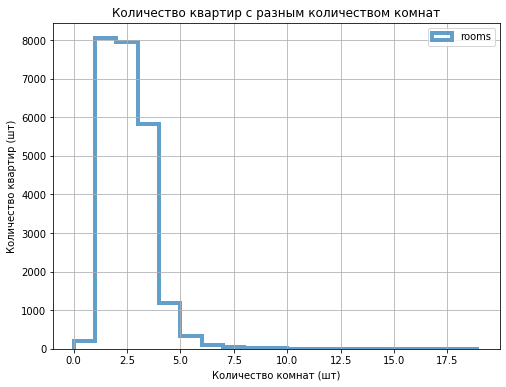

In [73]:
#построение гистограммы: количество комнат
df.plot(kind='hist',y='rooms',histtype='step',bins=19,linewidth=4,
    alpha=0.7,grid=True,legend=True,figsize=(8, 6), title='Количество квартир с разным количеством комнат')
plt.ylabel('Количество квартир (шт)')
plt.xlabel('Количество комнат (шт)')

Гистограмма отражает частоту встречаемости квартир с разным количеством комнат. На ней отражены все имеющиеся значения, те от 0 до 19. По гистограмме видно, что подавляющее большинство продаваемых квартир имеют 1, 2, 3 или 4 комнаты. Реже встречаются квартиры-студии (и свободная планировка) и квартиры, число комнат в которых превышает 5. Квартиры с количеством комнат более 10 столь редки, что их можно считать выбросами.
В целом гистограмма смещена вправо, тк специфика данных исключает значения меньше 0, но при этом не ограничивает максимальное значение.

Text(0.5, 0, 'Высота потолков (м)')

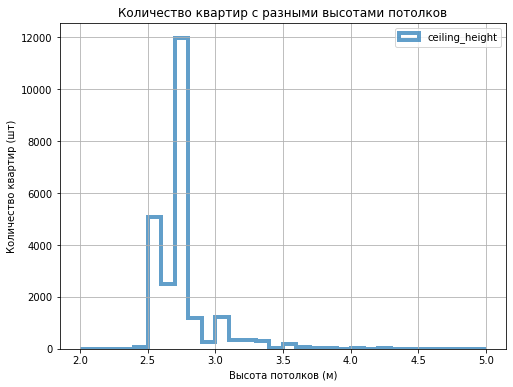

In [74]:
#построение гистограммы: высота потолков
df.plot(kind='hist',y='ceiling_height',histtype='step',bins=30,
    linewidth=4,alpha=0.7,grid=True,legend=True,figsize=(8, 6),range = (2, 5), title='Количество квартир с разными высотами потолков')
plt.ylabel('Количество квартир (шт)')
plt.xlabel('Высота потолков (м)')

In [75]:
# получение количества строк не попавших на гисторамму
len(df.query('2 > ceiling_height or ceiling_height > 5'))

39

<a id='4.1'></a>Гистограмма отражает частоту встречаемости квартир с разной высотой потолков. На ней отражены данные в диапазоне от 2м до 5м. Квартир с высотой потолков менее 2м или более 5м в исходных данных 39, те менее 0,2%. Будем считать их выбросами. На гистограмме наблюдается мощный узкий пик со значениями 2,7м это стандартная высота потолков в панельных домах. Также имеется менее мощный широкий пик со значениями около 3-3.4 м, предположительно за счет квартир старого фонда (сталинки).
Очень мало значений после 4.5 м. В целом гистограмма смещена вправо, тк специфика данных исключает чрезмерно малые значения, но при этом не ограничивает (в теории) максимальное значение.

### Изучение времени продажи квартиры

Text(0.5, 0, 'Длительность продажи (дней)')

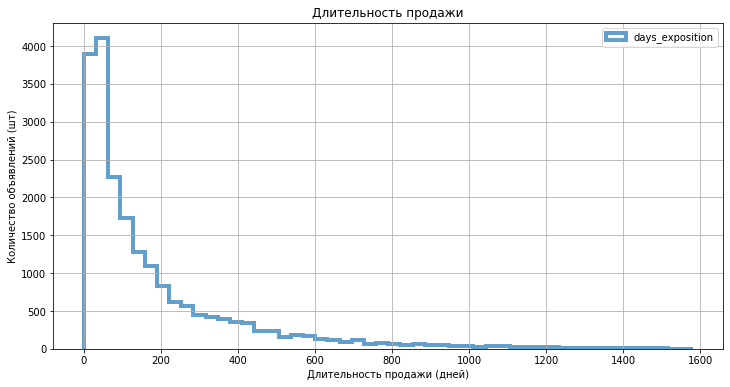

In [76]:
#построение гистограммы: время продажи квартир
df.plot(kind='hist',y='days_exposition',histtype='step',bins=50,
    linewidth=4,alpha=0.7,grid=True,legend=True,figsize=(12, 6), title='Длительность продажи')
plt.ylabel('Количество объявлений (шт)')
plt.xlabel('Длительность продажи (дней)')

In [77]:
#получеие общей стат информации
display(df.days_exposition.describe().round(decimals=2))

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

Время продажи квартир лежит в диапазоне от 1 дня до 1580 дней. Среднее значение по столбцу - 181 день, медианное - 95 дней. Такая разница между значениями говорит о том, что в столбце есть малое количество нетипично высоких значений. Это хорошо заметно на гистограмме - она имеет очень длинный "хвост".

В целом, распределение значений на графике соответствует распределение Пуассона, что нормально для описания событий в единицу времени. Распределение обрезано на нуле и имеет длинный «хвост» в положительную сторону.

По гистограмме можно сделать вывод, что обычно продажа занимает менее 200 дней, часто - менее 100.

Для того, чтобы ответить на вопрос, что считать экстремально быстрой продажей, посчитаем количество значений столбца менее 10 дней.

In [78]:
#получение количества удовлетворяющих условию значений столбца
df.query('days_exposition < 10')['days_exposition'].value_counts().sort_index(ascending=True)

1.00      1
2.00      3
3.00    158
4.00    176
5.00    152
6.00    124
7.00    234
8.00    139
9.00    143
Name: days_exposition, dtype: int64

Согласно полученной таблице, экстремально быстрой можно считать продажу, произошедшую спустя 1 или 2 дня с момента опубликования объявления. Таких быстрых продаж в исходной таблице всего 4.

Чтобы выявить экстремально долгие продажи построим диаграмму размаха. Для ее построения сразу отбросим объявления, значение длительности продаж по которым больше значения 3 квартиля (232 дня). Сохраним такие объявления в переменную too_slow.

In [79]:
#получение количества удовлетворяющих условию значений столбца
too_slow = df.query('days_exposition > 232')

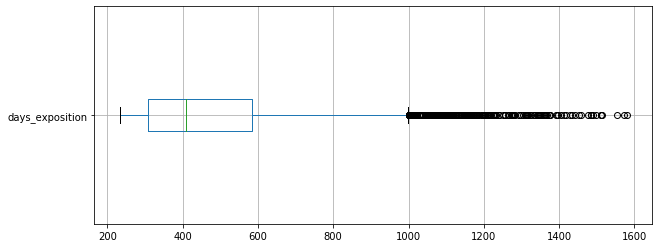

19

In [80]:
#построение диаграммы размаха
too_slow.boxplot('days_exposition', vert=False, figsize=(10, 4))
plt.show()
df.query('days_exposition > 1400')['days_exposition'].count()

Экстемально долгими будем считать продажи, продлившиеся более 1400 дней. По диагамме видно, что такие продажи встречаются крайне редко, всего 19 случаев среди всех данных.

### Работа с редкими и выбивающимися значениями

Работа по обнаружению редких и выбивающихся значений была проведена в разделе 2 при первичной обработке данных в разрезе каждого столбца, а также продолжена в подразделах 4.1 и 4.2. О наличии экстремально низких или экстремально высоких значений однозначно  можно говорить только в отношении столбца ceiling_height. Подробнее об этом в подразделах [2.6](#2.6) и [4.1](#4.1)

Согласно указанным подразделам, квартиры с высотой потолков менее 2м или более 5м считаем выбросами. 

Ранее, в рамках проведения предобработки данных столбца, пропущенные значения были заменены на среднее значение столбца, расчитанное в границах нормального (без выбросов) диапазона - ceiling_height_mean (2.72м). Аналогичным образом поступим и с выбивающимися значениями.

In [81]:
#замена экстремальных значений столбца на средние
def ceiling_height_normal(row):
    ceil_height = row['ceiling_height']
    if ceil_height < 2 or ceil_height > 5:
         return ceiling_height_mean
    return ceil_height
   
df['ceiling_height'] = df.apply(ceiling_height_normal, axis=1)

In [82]:
#получение общей стат информации после замены
df['ceiling_height'].describe()

count   23,699.00
mean         2.72
std          0.21
min          2.00
25%          2.60
50%          2.72
75%          2.72
max          5.00
Name: ceiling_height, dtype: float64

Всего было заменено 9234 значения столбца, из них 9195 - пропущенные значения, 39 - выбросы. После проведенной работы данные лежат в диапазоне от 2 до 5 м и выглядят однородно.

<a id='4.3'></a>Учитывая цель исследования, отдельное внимание уделим изучению данных столбца price_meter, те стоимости м2. Для определения средной рыночной стоимости м2 построим диаграмму размаха.

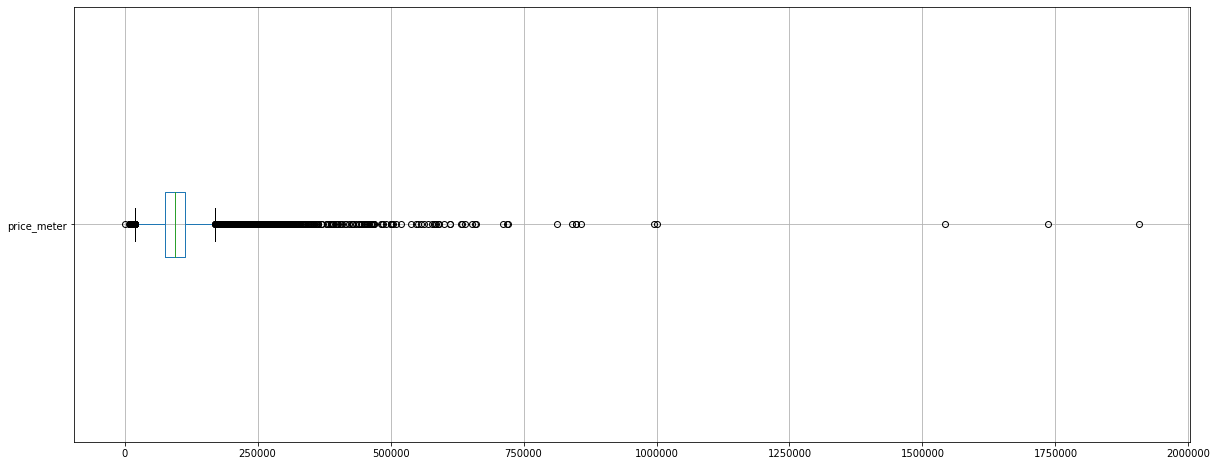

In [83]:
#построение диаграммы размаха
df.boxplot('price_meter', vert=False, figsize=(20, 8))
plt.show()

Изучив диаграмму можно выделить объявления со слишком низкой (отсечем ее по значению левого "уса" диаграммы) - менее 18 000, и слишком высокой (отсечем ее по границе 500 000) стоимостью м2. Объявления с такими выбивающимися значениями сохраним в таблицы too_low_price и  too_high_price соответственно. Попробуем в дальнейшем оценить наличие объективных поводов для завышения или занижения цены.

In [84]:
#сохранение срезов данных, подсчет количества объявлений
too_high_price = df.query('price_meter > 500000')
too_low_price = df.query('price_meter < 18000')
len(too_high_price), len(too_low_price)

(38, 122)

### Изучение факторов, влияющих на стоимость квартиры

Определим следующее:
- как зависит цена (price_meter) от площади (total_area), 
- как зависит цена (price_meter) от числа комнат(rooms),
- как зависит цена (price_meter) от удалённости от центра(city_сenters_nearest),
- как зависит цена (price_meter) от того, на каком этаже расположена квартира: первом, последнем или другом (floors_group),
- как зависит цена (price_meter) от даты размещения: дня недели(weekday_exposition), месяца (month_exposition) и года (year_exposition).

Для начала изучим корреляцию между значениями столбцов

In [85]:
#расчет коэффициентов корреляции
display(df['price_meter'].corr(df['total_area']))
display(df['price_meter'].corr(df['rooms']))
display(df['price_meter'].corr(df['city_сenters_nearest']))
display(df['price_meter'].corr(df['weekday_exposition']))
display(df['price_meter'].corr(df['month_exposition']))
df['price_meter'].corr(df['year_exposition'])

0.30196021001472556

0.05541965593528781

-0.31795076959343466

-0.007271504034011517

-0.0019954736808782078

0.008516101077766082

Значительная корреляция наблюдается между ценой от площадью и ценой и удалённостью от центра. Причем в первом случае корреляция положительна (увеличение одного показателя приводит к аналогичному росту другого), а во втором - отрицательная (увеличение одного показателя приводит к аналогичному уменьшению другого).
Явная взаимосвязь между значениями других исследуемых столбцов отсутствует.


Text(0.5, 0, 'Общая площадь (м2)')

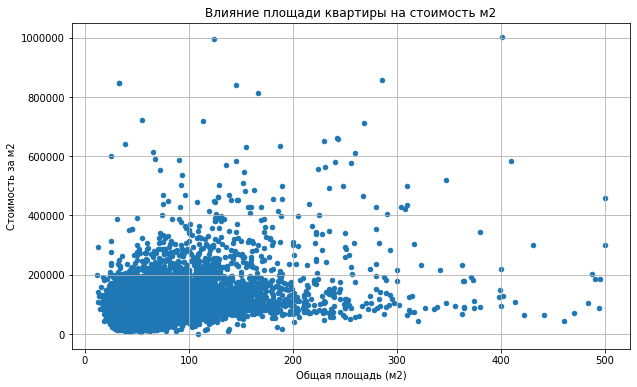

In [86]:
#построение диаграммы рассеяния
df.query('total_area <= 500 and price_meter <= 1250000').plot(x='total_area', y='price_meter', kind='scatter', 
                                                              grid=True, figsize=(10, 6), title='Влияние площади квартиры на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('Общая площадь (м2)')

Наблюдается слабая корреляция. Площадь квартиры в чаще всего не оказывает существенного влияния на стоимость квадратного метра жилья.

Text(0.5, 0, 'Количество комнат (шт)')

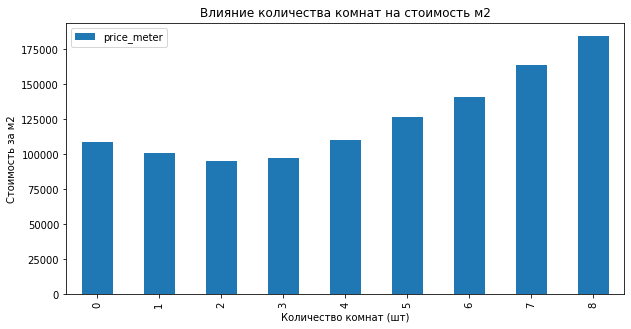

In [87]:
#построение столбчатой диаграммы
df.query('rooms < 9').pivot_table(index='rooms', values='price_meter', aggfunc='mean').plot(kind='bar', y='price_meter', 
                                                                                            figsize=(10, 5), 
                                                                                            title='Влияние количества комнат на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('Количество комнат (шт)')

Существует явная взаимосвязь между количеством комнат и стоимостью м2. 1-2-3 комнатные квартиры имеют наименьшую стоимость, дороже продаются квартиры студии или квартиры со свободной планировкой. Наименьшим количеством предложений и, как следствие, высокой ценой характеризуются многокомнатные квартиры.

Text(0.5, 0, 'Расстояние от центра (м)')

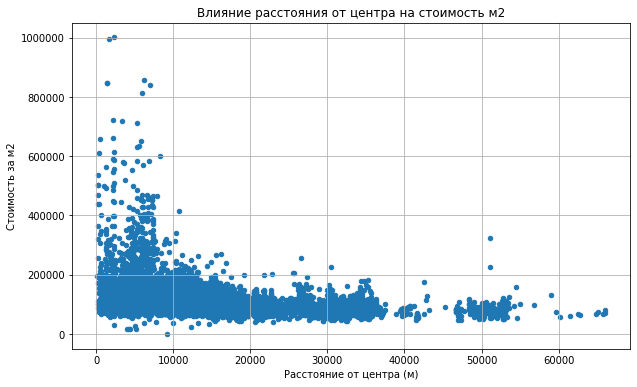

In [88]:
#построение диаграммы рассеяния
df.query('price_meter <= 1250000').plot(x='city_сenters_nearest', y='price_meter', kind='scatter', 
                                        grid=True, figsize=(10, 6), title='Влияние расстояния от центра на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('Расстояние от центра (м)')

Согласно графику действительно есть некоторая неоднозначная взаимосвязь между ценой и близостью к центру. Ее проявления можно наблюдать в верхнем левом углу поля диаграммы (скопление нетипично высоких значений стоимости в самом центра города) и в нижнем правом (скопление нетипично низких значений стоимости на окраинах). Однако, в большинстве случаев можно говорить о нулевой кореляции.

Text(0.5, 0, 'Этаж')

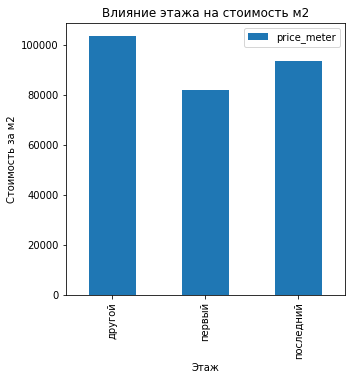

In [89]:
#построение столбчатой диаграммы
df.pivot_table(index='floors_group', values='price_meter', aggfunc='mean').plot(kind='bar', y='price_meter', 
                                                                                figsize=(5, 5), 
                                                                                title='Влияние этажа на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('Этаж')

Ожидаемо, квартиры, расположенные на первом этаже пользуются наименьшим спросом и, сотственно, имеют самую низкую стоимость за м2. Немного дороже квартиры последних этажей. По наибольшей стоимости продаются другие квартиры, расположенные не на первом и не на последнем этажах.

Text(0.5, 0, 'День размещения объявления')

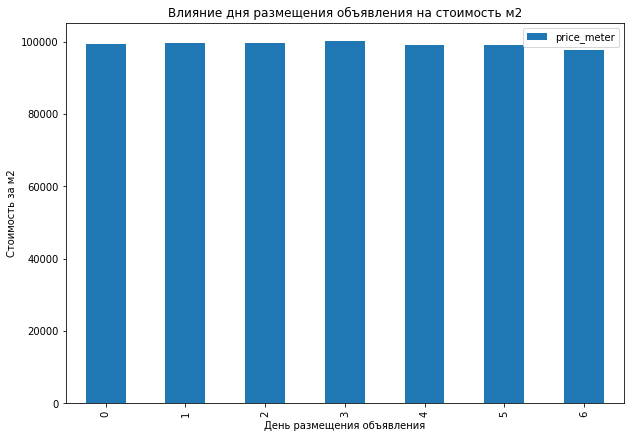

In [90]:
#построение столбчатой диаграммы
df.pivot_table(index='weekday_exposition', values='price_meter', aggfunc='mean').plot(kind='bar', y='price_meter', 
                                                                                      figsize=(10, 7), 
                                                                                      title='Влияние дня размещения объявления на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('День размещения объявления')

Согласно графику можно говорить об отсутствии влияния дня размещения объявления на стоимость продаваемого объекта.

Text(0.5, 0, 'Месяц размещения объявления')

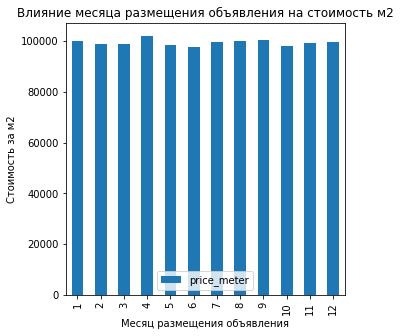

In [91]:
#построение столбчатой диаграммы
df.pivot_table(index='month_exposition', values='price_meter', aggfunc='mean').plot(kind='bar', 
                                                                                    y='price_meter', figsize=(5, 5), 
                                                                                    title='Влияние месяца размещения объявления на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('Месяц размещения объявления')

Наблюдается некоторая сезонность в росте цен, обусловленная повышением спроса весной и осенью. 

Осенью активность на рынке недвижимости повышается в связи с началом делового сезона. Затем постепенно снижается и возвращается к середине весны, когда световой день становится длиннее, а погода лучше: так люди более настроены на просмотры.

Text(0.5, 0, 'Год размещения объявления')

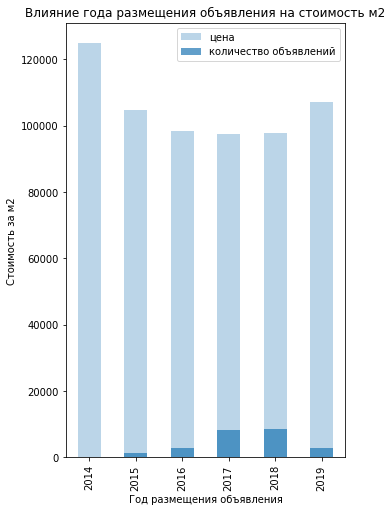

In [92]:
#построение столбчатой диаграммы
ax = df.pivot_table(index='year_exposition', values='price_meter', aggfunc='mean').sort_index(ascending=True).plot(label='цена', alpha=0.3, 
                                                                                                                   kind='bar', y='price_meter', figsize=(5, 12))
df.pivot_table(index='year_exposition', values='price_meter', aggfunc='count').sort_index(ascending=True).plot(label='количество объявлений', ax=ax, alpha=0.7, 
                                                                                                               kind='bar', y='price_meter', figsize=(5, 8), 
                                                                                                               title='Влияние года размещения объявления на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('Год размещения объявления')

Отображенная динамика изменения стоимости м2 в течении исследуемого периода повторяет общую ситуацию на рынке недвижимости, характерную почти для всех крупных городов страны. Кризис на рынке недвижимости в 2014 году повлек за собой снижение количества предложений на вторичном рынке и, как следствие, резкое увеличение стоимости. После этого началось увеличение продаж и снижение цены. Самая благополучная для покупки недвижимости ситуция складывалась в 2018 году: значительное количество предложений и наименьшая средняя цена. С 2019 года вновь началось подорожание квартир на фоне снижения активности.

### Изучение населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений. 

In [93]:
#сортировка значений столбца locality_name
df['locality_name'].value_counts().head(10)

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

Сохраним выбранные города в список city_name. Выберем из исходной таблицы объявления в этих населенных пунктах, оставим по ним столбцы с наименованием населенного пункта и со стоимостью м2

In [94]:
#формирование отфильтрованной таблицы и ее группировка по населенному пункту
city_name = ['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг']
df_big_city = df.query('locality_name in @city_name')
df_big_city = df_big_city[['locality_name', 'price_meter']]
big_city_group = df_big_city.groupby('locality_name')['price_meter'].agg(['count', 'mean'])

Переименуем столбцы в полученной таблице: столбец number_of_apartments содержит информацию о количестве объявлений, price_mean - о средней стоимости м2. Значения стоимости округлим до двух знаков.
Полученную сводную таблицу отсортируем по столбцу price_mean

In [95]:
#форматирование таблицы
big_city_group.columns = ['number_of_apartments', 'price_mean']
big_city_group['price_mean'] = big_city_group['price_mean'].round(decimals=2)
big_city_group = big_city_group.sort_values(by='price_mean')
big_city_group

,number_of_apartments,price_mean
locality_name,,
Выборг,237,"58,141.91"
Всеволожск,398,"68,654.47"
Гатчина,307,"68,746.15"
Колпино,338,"75,424.58"
Шушары,440,"78,677.36"
Мурино,590,"86,087.51"
Парголово,327,"90,175.91"
Кудрово,472,"95,324.93"
Пушкин,369,"103,125.82"


Согласно полученной таблице наибольшее количество объявлений как и самая высокая стоимость жилья - в Санкт-Петербурге - 114 849 за м2. Это было ожидаемо, стоимость недвижимости в мегаполисах всегда значительно выше чем в других, более мелких, городах. 
Наименьшая стоимость жилья среди выделенных городов в Выборге - 58 141 за м2.

### Изучение зависимости стоимости квартир от расстояния до центра

Для изучения зависимости стоимости квартир от расстояния до центра выделем из исходной таблицы объявления о продажи квартир в Санкт-Петербурге. Оставим необходимые для работы столбцы - city_сenters_nearest (расстояние до центра) и price_meter(стоимость м2). Получившийся срез данных сохраним в df_spb, подсчитаем в нем общее количество строк и количество пропущенных значений.

In [96]:
#получение среза данных
df_spb = df.query('locality_name == "Санкт-Петербург"').reset_index()
df_spb = df_spb[['city_сenters_nearest', 'price_meter']]

In [97]:
#оценка объема пропущенных значений
display(len(df_spb))
df_spb['city_сenters_nearest'].isna().sum()

15721

61

Общее количество строк в таблице df_spb 15 721. В столбце city_сenters_nearest имеется 61 пропущенное значение (менее 0,4% от общего объема). Строки с пропущенными значениями отбросим.

In [98]:
#удаление пропущенных значений
df_spb = df_spb.dropna(subset = ['city_сenters_nearest'])
df_spb.isna().sum()

city_сenters_nearest    0
price_meter             0
dtype: int64

Создадим столбец с расстоянием до центра в километрах, округлим до целых значений. Выведем первые строки получившейся таблицы.

In [99]:
#добавление столбца
df_spb['сenters_nearest_km'] = df_spb['city_сenters_nearest'] / 1000
df_spb['сenters_nearest_km'] = df_spb['сenters_nearest_km'].astype('int')
df_spb.head()

,city_сenters_nearest,price_meter,сenters_nearest_km
0,"16,028.00","120,370.37",16
1,"13,933.00","92,785.71",13
2,"6,800.00","408,176.10",6
3,"8,098.00","100,000.00",8
4,"11,634.00","110,544.69",11


Сгруппируем все объявления по значению добавленного столбца сenters_nearest_km, для каждой из категорий получим значение средней стоимости м2. Построим линейный график зависимости стоимости м2 от удаленности от центра.

In [100]:
#группировка данных, получение средних значений
df_spb_group = df_spb.groupby('сenters_nearest_km')['price_meter'].mean()

Text(0.5, 0, 'Расстояние от центра (км)')

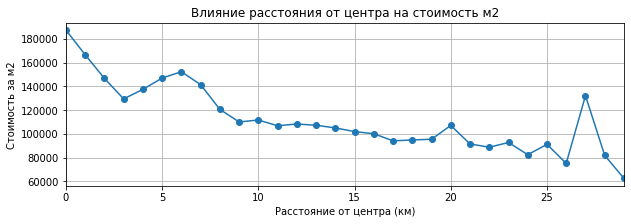

In [101]:
#построение линейного графика
df_spb_group.plot(y='сenters_nearest_km', x='index', style='o-', grid=True, title='Влияние расстояния от центра на стоимость м2', figsize=(10, 3))
plt.ylabel('Стоимость за м2')
plt.xlabel('Расстояние от центра (км)')

На линейном графике четко виден максимум стоимости м2 (180 000), он, ожидаемо, тяготеет к нулевому значению удаленности от центра. Далее с увеличением расстояния до центра наблюдается движение графика вниз, сначало резкое, затем (после 8км) более плавное. Ограничим центральную зону радиусом 8км.

### Изучение квартир центральной зоны

Проанализируем объявления о продаже квартир в центральной части города Санкт-Петербурга. Сохраним их в df_spb_сenters, выберем столбцы, необходимые для анализа.
Проанализируем эту территорию и изучим следующие параметры: площадь (total_area), цена (price_meter), число комнат (rooms), высота потолков (ceiling_height).
Выясним:
- как зависит цена (price_meter) от числа комнат(rooms),
- как зависит цена (price_meter) от удалённости от центра(city_сenters_nearest),
- как зависит цена (price_meter) от того, на каком этаже расположена квартира: первом, последнем или другом (floors_group),
- как зависит цена (price_meter) от даты размещения: дня недели(weekday_exposition), месяца (month_exposition) и года (year_exposition).

In [102]:
#получение среза данных
df_spb_сenters = df.query('locality_name == "Санкт-Петербург" and city_сenters_nearest <= 8000.0')
df_spb_сenters = df_spb_сenters[['total_area','price_meter', 'rooms', 'ceiling_height', 'floors_group', 'city_сenters_nearest', 'weekday_exposition', 'month_exposition', 'year_exposition']]
df_spb_сenters.head()

,total_area,price_meter,rooms,ceiling_height,floors_group,city_сenters_nearest,weekday_exposition,month_exposition,year_exposition
3,159.00,"408,176.10",3,2.72,другой,"6,800.00",4,7,2015
24,97.20,"66,872.43",2,2.72,первый,"2,336.00",5,10,2015
35,149.00,"104,026.85",5,2.72,другой,"3,502.00",0,6,2017
51,161.00,"279,503.11",3,3.20,другой,"6,589.00",1,10,2017
52,136.00,"86,727.94",6,3.00,последний,"6,582.00",4,9,2017


Text(0.5, 0, 'Общая площадь (м2)')

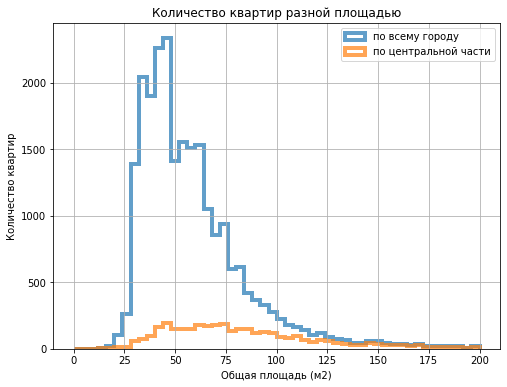

In [103]:
#построение групповой гистограммы: общая площадь
ax = df.plot(kind='hist', y='total_area', histtype='step', bins=50, range = (0, 200), linewidth=4,
                    alpha=0.7, grid=True, legend=True, figsize=(8, 6), label='по всему городу')
df_spb_сenters.plot(kind='hist', y='total_area', histtype='step', bins=50, range = (0, 200), linewidth=4,
                    alpha=0.7, grid=True, legend=True, figsize=(8, 6), ax=ax, label='по центральной части', 
                    title='Количество квартир разной площадью')
plt.ylabel('Количество квартир')
plt.xlabel('Общая площадь (м2)')

В целом в центральной части города и по всей исследуемой территории наблюдается сопоставимое количество квартир разной площади. Гистограмма по центральной части имеет более сглаженные очертания в связи с меньшим количеством объектов в выборке.

Text(0.5, 0, 'Стоимость за м2')

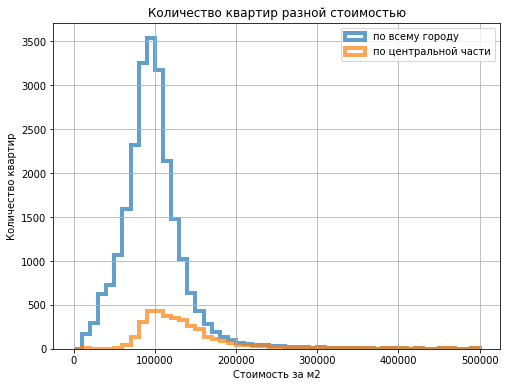

In [104]:
#построение групповой гистограммы: цена
ax=df.plot(kind='hist',y='price_meter',histtype='step',bins=50,
    linewidth=4,alpha=0.7,grid=True,legend=True,range = (0, 500000),figsize=(8, 6), label='по всему городу')
df_spb_сenters.plot(kind='hist',y='price_meter',histtype='step',bins=50,ax=ax, title='Количество квартир разной стоимостью',
    linewidth=4,alpha=0.7,grid=True,legend=True,range = (0, 500000),figsize=(8, 6), label='по центральной части')
plt.ylabel('Количество квартир')
plt.xlabel('Стоимость за м2')

Стоимость м2 в центральной части города значительно выше, в связи с чем гистограмма по центральной части имеет более крутой подьем к своей вершине и менее крутой спуск от нее.

Text(0.5, 0, 'Количество комнат (шт)')

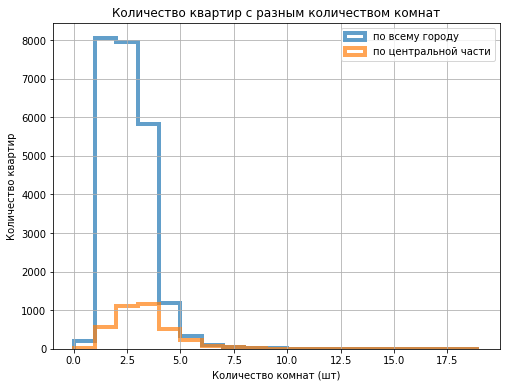

In [105]:
#построение групповой гистограммы: количество комнат
ax = df.plot(kind='hist',y='rooms',histtype='step',bins=19,linewidth=4, label='по всему городу',
    alpha=0.7,grid=True,legend=True,figsize=(8, 6))
df_spb_сenters.plot(kind='hist',y='rooms',histtype='step',bins=19,linewidth=4, label='по центральной части',
    alpha=0.7,grid=True,legend=True,figsize=(8, 6), ax=ax, title='Количество квартир с разным количеством комнат')
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат (шт)')

В целом в центральной части города и по всей исследуемой территории наблюдается сопоставимое количество квартир с разным количеством комнат. Гистограмма по центральной части имеет более сглаженные очертания в связи с меньшим количеством объектов в выборке.

Text(0.5, 0, 'Высота потолков (м)')

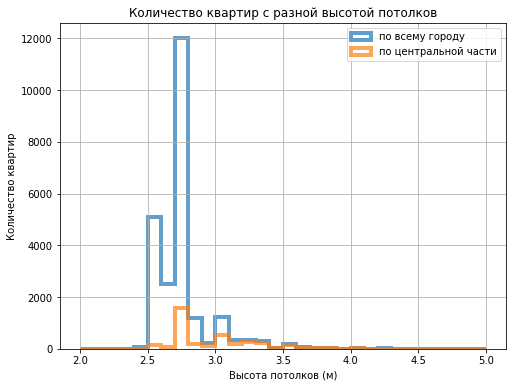

In [106]:
#построение групповой гистограммы: высота потолков
ax = df.plot(kind='hist',y='ceiling_height',histtype='step',bins=30, label='по всему городу',
    linewidth=4,alpha=0.7,grid=True,legend=True,figsize=(8, 6),range = (2, 5))
df_spb_сenters.plot(kind='hist',y='ceiling_height',histtype='step',bins=30, ax=ax,
    linewidth=4,alpha=0.7,grid=True,legend=True,figsize=(8, 6),range = (2, 5), label='по центральной части',
                    title='Количество квартир с разной высотой потолков')
plt.ylabel('Количество квартир')
plt.xlabel('Высота потолков (м)')

В целом в центральной части города и по всей исследуемой территории наблюдается сопоставимое количество квартир с разной высотой потолков. Гистограмма по центральной части имеет более сглаженные очертания в связи с меньшим количеством объектов в выборке.

Text(0.5, 0, 'Количество комнат (шт)')

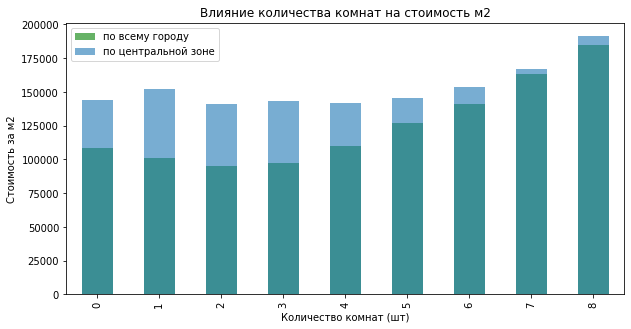

In [107]:
#построение групповой столбчатой диаграммы: количество комнат
ax=df.query('rooms < 9').pivot_table(index='rooms', values='price_meter', aggfunc='mean').plot(alpha=0.6, 
                                                                                               color='g', 
                                                                                               kind='bar', 
                                                                                               y='price_meter', 
                                                                                               figsize=(10, 5), 
                                                                                               title='Влияние количества комнат на стоимость м2', 
                                                                                               label='по всему городу')
df_spb_сenters.query('rooms < 9').pivot_table(index='rooms', values='price_meter', aggfunc='mean').plot(ax=ax, 
                                                                                                        alpha=0.6, 
                                                                                                        kind='bar', 
                                                                                                        y='price_meter', 
                                                                                                        figsize=(10, 5), 
                                                                                                        title='Влияние количества комнат на стоимость м2', 
                                                                                                        label='по центральной зоне')
plt.ylabel('Стоимость за м2')
plt.xlabel('Количество комнат (шт)')

В целом в центральной части города бОльшим спросом чем на остальной исследуемой территории пользуются 1-2-3 комнатные квартиры. 2-3 комнатные квартиры в центральной части не уступают стоимости квартирам-студиям и 4-5 комнатным квартирам, а 1 комнатные даже значительно ее превышают.

Text(0.5, 0, 'Расстояние до центра (м)')

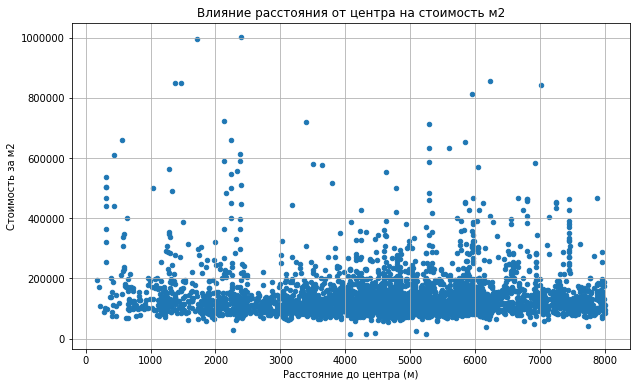

In [108]:
#построение диаграммы рассеяния: расстояние от центра
df_spb_сenters.query('price_meter <= 1250000').plot(x='city_сenters_nearest', 
                                                    y='price_meter', kind='scatter', grid=True, figsize=(10, 6), 
                                                    title='Влияние расстояния от центра на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('Расстояние до центра (м)')

Корреляция нулевая. Соответствует выводам полученным по всей территории в целом.

Text(0.5, 0, 'Этаж')

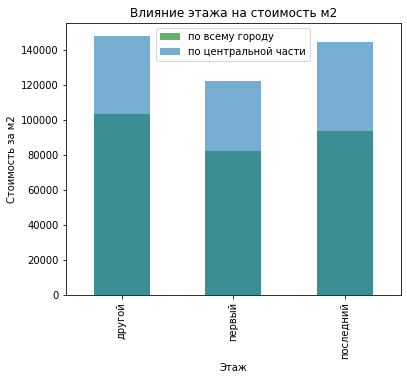

In [109]:
#построение групповой столбчатой диаграммы: этаж
ax = df.pivot_table(index='floors_group', values='price_meter', aggfunc='mean').plot(kind='bar',
                                                                                     alpha=0.6,
                                                                                     color='g',
                                                                                     y='price_meter',
                                                                                     figsize=(6, 5),
                                                                                     title='Влияние этажа на стоимость м2',
                                                                                    label='по всему городу')
#построение столбчатой диаграммы
df_spb_сenters.pivot_table(index='floors_group', values='price_meter', aggfunc='mean').plot(kind='bar', ax=ax,
                                                                                alpha=0.6,
                                                                                y='price_meter', 
                                                                                figsize=(6, 5), 
                                                                                title='Влияние этажа на стоимость м2',
                                                                                label='по центральной части')
plt.ylabel('Стоимость за м2')
plt.xlabel('Этаж')

Влияние этажа на стоимость по центральной части соответствует выводам полученным по всей территории в целом.

Text(0.5, 0, 'День размещения объявления')

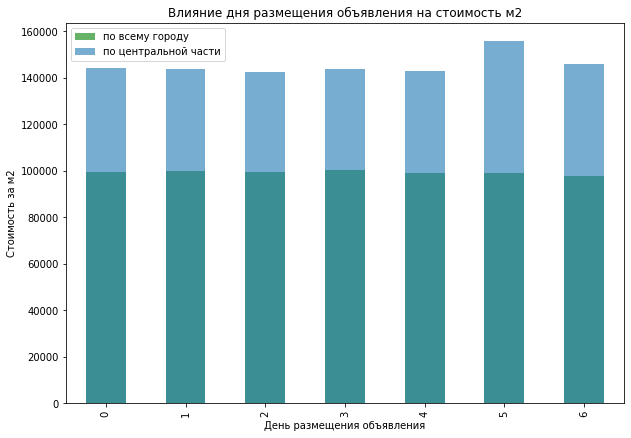

In [110]:
#построение групповой столбчатой диаграммы: день опубликования
ax = df.pivot_table(index='weekday_exposition', values='price_meter', aggfunc='mean').plot(kind='bar', y='price_meter', 
                                                                                      figsize=(10, 7), label='по всему городу',
                                                                                      alpha=0.6, color='g')
df_spb_сenters.pivot_table(index='weekday_exposition', values='price_meter', aggfunc='mean').plot(kind='bar', y='price_meter',
                                                                                      alpha=0.6, ax=ax,
                                                                                      figsize=(10, 7), label='по центральной части',
                                                                                      title='Влияние дня размещения объявления на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('День размещения объявления')

Жители центральной части города по субботам публикуют более дорогие объявления чем в остальные дни. Для жителей окраин это не характерно.

Text(0.5, 0, 'Месяц размещения объявления')

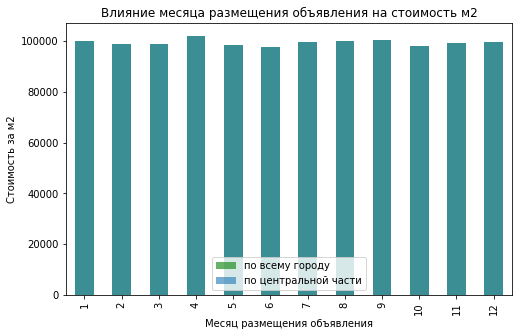

In [111]:
#построение групповой столбчатой диаграммы: месяц опубликования
ax = df.pivot_table(index='month_exposition', values='price_meter', aggfunc='mean').plot(kind='bar', label='по всему городу', alpha=0.6,
                                                                                    y='price_meter', figsize=(5, 5), color='g',
                                                                                    title='Влияние месяца размещения объявления на стоимость м2')
df.pivot_table(index='month_exposition', values='price_meter', aggfunc='mean').plot(kind='bar', ax=ax, label='по центральной части',
                                                                                    y='price_meter', figsize=(8, 5), alpha=0.6, 
                                                                                    title='Влияние месяца размещения объявления на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('Месяц размещения объявления')

Полное совпадение. Влияние месяца опубликования объявления для центральной части и окраиной не отличается.

Text(0.5, 0, 'Год размещения объявления')

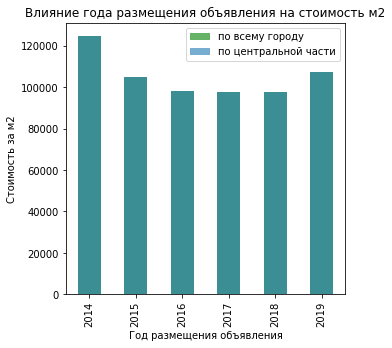

In [112]:
#построение групповой столбчатой диаграммы: год опубликования
ax = df.pivot_table(index='year_exposition', values='price_meter', aggfunc='mean').sort_index(ascending=True).plot(label='по всему городу', alpha=0.6, color='g',
                                                                                                                   kind='bar', y='price_meter', figsize=(5, 5))
df.pivot_table(index='year_exposition', values='price_meter', aggfunc='mean').sort_index(ascending=True).plot(label='по центральной части', alpha=0.6, ax=ax,
                                                                                                                   kind='bar', y='price_meter', figsize=(5, 5),
                                                                                                             title='Влияние года размещения объявления на стоимость м2')
plt.ylabel('Стоимость за м2')
plt.xlabel('Год размещения объявления')

Полное совпадение. Влияние года опубликования объявления для центральной части и окраиной не отличается.

### Вывод

Различия между продаваемыми квартирами центральной части города и остальной территорией можно заметить по следующим критериям:
- стоимость квадратного метра (в центре выше),
- зависимость цены от количества комнат (в центре больше котируются 1-2-3 комнатные квартиры),
- зависимость цены от дня размещения объявления (в центре по субботам дороже).
Прочие изученные критерии для центральной части и окраины не отличаются.

## Общий вывод

В ходе исследования установлено наличие взаимосвязи между стоимостью квадратного метра жилья и такими параметрами как
- площадь квартиры (чем больше общая площадь, тем дороже и квадратный метр),
- расположение (в Санкт-Петербурге стоимость квадратного метра жилья значительно выше чем в других городах области), 
- удаленность от центра (самая дорогая зона ограничена радиусом 8 км), 
- дата размещения объявления о продаже (влияние оказывает общая экономическая ситуация в стране, и сезонность - в апреле и сентябре цены выше), 
- этаж (на первом и последнем этажах дешевле),
- количество комнат (для центра - самые дорогие 1комнатные квартиры затем 5комнатные и более, для окраин - 1-2-3 комнатные самые дешевые).
Причем характер влияния такого параметра как количество комнат различается для квартир в центре города и на окраинах.

Можно приступать к проверке гипотез, выдвинутых в начале исследования, а именно:

Существует обратная зависимость между стоимостью квадратного метра жилья и удаленностью от центра города, те при увеличении расстояния от центра стоимость снижается.
Гипотеза подтвердилась: действительно наибольшее влияние на стоимость квадратного метра жилья оказывает удаленность от центра города, причем в отношении Санкт-Петербурга можно выделить центральную зону радиусом 8 км, в границах которой средняя стоимость квадратного метра жилья досстигает максимума.

Существует обратная зависимость между стоимостью квадратного метра и общей площадью квартиры, те чем больше площадь объекта, тем дешевле каждый его квадратный метр.
Гипотеза не подтвердилась: действительно существует некоторая корреляция между общей площадью жилья и стоимостью квадратного метра, однако зависимость прямая, а не обратная. Большее влияние на стоимость квадратного метра оказывает не общая площадь, а количество комнат.

Таким образом, утверждение о том, что наибольшей ценой обладают небольшие квартиры, расположенные в центральной зоне города Санкт-Петербурга подтвердилось.

Опробуем полученные критерии на практике применительно к нашим исходным данным. В подразделе [4.3](#4.3) исследования были выделены объявления со слишком низкой - менее 18 000, и слишком высокой - более 500 000, стоимостью м2. Объявления с такими выбивающимися значениями сохранены в таблицах too_low_price и too_high_price соответственно.

Получим наиболее частые (для категорийных столбцов) или медианные (для количественных столбцов) значения. Соберем их в итоговой таблице high_and_low_result

In [113]:
#формирование таблицы с высокой ценой
too_high_price_sect = too_high_price[['price_meter', 'rooms', 'year_exposition', 'weekday_exposition', 'total_area', 'locality_name', 'city_сenters_nearest', 'floors_group']]
too_high_price_sect.sort_values(ascending=False, by='price_meter').head()

,price_meter,rooms,year_exposition,weekday_exposition,total_area,locality_name,city_сenters_nearest,floors_group
12971,"1,907,500.00",7,2017,5,400.00,Санкт-Петербург,"3,956.00",последний
1436,"1,736,842.11",3,2018,2,190.00,Санкт-Петербург,"1,197.00",другой
22831,"1,542,604.80",2,2019,1,187.50,Санкт-Петербург,"1,073.00",последний
14706,"1,000,748.13",5,2016,5,401.00,Санкт-Петербург,"2,389.00",последний
4996,"995,983.94",4,2017,3,124.50,Санкт-Петербург,"1,722.00",другой


In [114]:
#получение значений для итоговой таблицы
high_rooms = too_high_price_sect.rooms.value_counts().idxmax()
high_total_area = too_high_price_sect.total_area.median()
high_year_exposition = too_high_price_sect.year_exposition.value_counts().idxmax()
high_weekday_exposition = too_high_price_sect.weekday_exposition.value_counts().idxmax()
high_locality_name = too_high_price_sect.locality_name.value_counts().idxmax()
high_city_сenters_nearest = too_high_price_sect.city_сenters_nearest.median()
high_floors_group = too_high_price_sect.floors_group.value_counts().idxmax()

In [115]:
#формирование таблицы с низкой ценой
too_low_price_sect= too_low_price[['price_meter', 'rooms', 'year_exposition', 'weekday_exposition', 'total_area', 'locality_name', 'city_сenters_nearest', 'floors_group']]
too_low_price_sect.sort_values(by='price_meter').head()

,price_meter,rooms,year_exposition,weekday_exposition,total_area,locality_name,city_сenters_nearest,floors_group
8793,111.83,2,2019,2,109.00,Санкт-Петербург,"9,176.00",последний
14911,"7,962.96",2,2018,1,54.00,Свирь,nan,последний
4405,"9,615.38",2,2018,3,52.00,Сланцы,nan,первый
11351,"10,185.19",2,2019,3,54.00,Сланцы,nan,первый
9581,"10,368.66",2,2018,4,43.40,Старополье,nan,другой


In [116]:
#получение значений для итоговой таблицы
low_rooms = too_low_price_sect.rooms.value_counts().idxmax()
low_total_area = too_low_price_sect.total_area.median()
low_year_exposition = too_low_price_sect.year_exposition.value_counts().idxmax()
low_weekday_exposition = too_low_price_sect.weekday_exposition.value_counts().idxmax()
low_locality_name = too_low_price_sect.locality_name.value_counts().idxmax()
low_city_сenters_nearest = too_low_price_sect.city_сenters_nearest.value_counts()
low_floors_group = too_low_price_sect.floors_group.value_counts().idxmax()

In [117]:
high_and_low_result = pd.DataFrame({'': ['high_price', 'low_price'], 'rooms': [high_rooms, low_rooms],
                                   'total_area': [high_total_area, low_total_area], 'year_exposition': [high_year_exposition, low_year_exposition],
                                   'weekday_exposition': [high_weekday_exposition, low_weekday_exposition], 'locality_name': [high_locality_name, low_locality_name],
                                   'city_сenters_nearest': [high_city_сenters_nearest, '-'], 'floors_group': [high_floors_group, low_floors_group]})
high_and_low_result

,,rooms,total_area,year_exposition,weekday_exposition,locality_name,city_сenters_nearest,floors_group
0,high_price,3,154.00,2017,3,Санкт-Петербург,"2,389.00",другой
1,low_price,2,51.05,2018,4,Сланцы,-,последний


Подтверждение теории на практике.
Самые дорогие квартиры - это 1-2-3 комнатные квартиры большой площади, расположенные в Санкт-Петербурге на расстоянии не более 8 км от центра, этаж не первый и не последний.
Самые дешевые - 1-2-3 комнатные квартиры расположенные за пределами Санкт-Петербурга на первом или последнем этаже.

Исходя из всего вышесказанного можно отметить объявление с индексом 8793, возглавляющее таблицу too_low_price_sect. Цена явно занижена, можно предположить мошенническую деятельность.

In [118]:
df.loc[8793]

total_images                              7
last_price                        12,190.00
total_area                           109.00
first_day_exposition    2019-03-20 00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                          25.00
living_area                           32.00
floor                                    25
is_apartment                              0
studio                                False
open_plan                             False
kitchen_area                          40.50
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                  36,421.00
city_сenters_nearest               9,176.00
parks_around_3000                      1.00
parks_nearest                        805.00
ponds_around_3000                      0.00
ponds_nearest                           NaN
days_exposition                        8.00
price_meter                     